# Real-world Data Wrangling

In [1]:
!python -m pip install kaggle==1.6.12

In [2]:
!pip install --target=/workspace ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3b/07/1252560194df2b4fad1cb3c46081b948331c63eb1bb0b97620d508d12a53/ucimlrepo-0.0.7-py3-none-any.whl.metadata
  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Obtaining dependency information for pandas>=1.0.0 from https://files.pythonhosted.org/packages/ab/63/966db1321a0ad55df1d1fe51505d2cdae191b84c907974873817b0a6e849/pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for certifi>=2020.12.5 from https://files.pythonhosted.org/packages/5b/11/1e78951465b4a225519b8c3ad29769c49e0d8d157a070f681d5b6d64737f/certifi-2024.6.2-py3-none-any.whl.metadata
  Using cached certifi-2024.6.2-py3-none-any.whl.metadata (2.2 kB)
  Obtaining dependency information for numpy>=1.23.2 from https://files.pythonhosted.org/packages/9b/0f/022ca4783b6e6239a53b988a4d315d67f9ae7126227fb2255054a558bd72/nu

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.0.0 which is incompatible.
scipy 1.11.1 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.0.0 which is incompatible.


In [3]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

For this project, I aim to analyze the relationship between book characteristics and user ratings to identify what factors most influence high ratings. I will be wrangling two datasets: the "Books_rating" dataset, which contains user reviews and ratings of books, and the "Books Data" dataset, which provides detailed information about the books, including descriptions, authors, and publication details. By merging these datasets, I will investigate patterns and correlations to understand what makes a book well-received by readers.

### Research Questions : 
#### 1- what is the Most frequent Words in over 3 rated Reiews 
#### 2- Top 10 Authors with 5 star Ratings



### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1** : Books_rating 
Description : The dataset contain feedback about 3M user on 212404 unique books the data set is part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.

Type: CSV File 

Method:The data was gathered using the "Downloading files manually " method from Kaggle.

Dataset variables:

*   id: The Id of Book
*   Title: Book Title 
*   Price: The price of Book
*   User_id: Id of the user who rates the book
*   profileName: Name of the user who rates the book
*   review/helpfulness: helpfulness rating of the review, e.g. 2/3
*   review/score: rating from 0 to 5 for the book
*   review/time: time of given the review
*   review/summary: the summary of a text review
*   review/text: the full text of a review

In [6]:
#import nessecary libraries 
import pandas as pd 
import kaggle
import numpy as np
import matplotlib as plt
import seaborn as sb
import requests

In [7]:
Book_rating=pd.read_csv('Books_rating.csv')

In [8]:
Book_rating = Book_rating.sample(50000)

In [10]:
Book_rating.shape

(50000, 10)

# Notice : i cant upload the Book_rating CSV file to the submission due to large size of file (2.86GB) rather that i upload a random sample dataset file (Book_rating_raw) which is smaller than the original file 

#### Dataset 2 : Books Data

Description : The dataset contains details information about 212404 unique books it file is built by using google books API to get details information about books .

Type: CSV File 

Method: The data was gathered using the "API" method from Kaggle 

Dataset variables:

*   TitleBook: Title
*   Descripe: decription of book
*   authors:Neme of book authors
*   image:url for book cover
*   previewLink:link to access this book on google Books
*   publisher: Name of the publisheer
*   publishedDate: the date of publish
*   infoLink: link to get more information about the book on google books
*   categories:	genres of books
*   ratingsCount: averaging rating for book

In [11]:
import opendatasets as od 

In [12]:
#import data from kaggle API
kaggle_dataset_url = 'https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews'
od.download(kaggle_dataset_url)

Skipping, found downloaded files in ".\amazon-books-reviews" (use force=True to force download)


In [13]:
# load book_data dataset
csv_file_path = 'amazon-books-reviews/books_data.csv'
book_data= pd.read_csv(csv_file_path)
book_data

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0


## 2. Assess data



## Dataset 1 : Book_rating 

### Quality Issue 1: Completeness


In [14]:
#Inspecting the dataframe visiually 
Book_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
156285,B000P3LVZA,Brave New World,NaN,NaN,NaN,0/0,5.0,881107200,"Excellent book, he wrote 20 years ago what's h...",Aldou huxley was a remarkable writer. And perh...
621965,B0007DJSVW,The true believer: Thoughts on the nature of m...,NaN,A6ATAUDS9UHXT,Charles Cieri,3/4,5.0,1275696000,A must read for anyone who thinks,You'll think it was written in whatever year y...
908905,0786118490,Persuasion,NaN,NaN,NaN,0/0,4.0,901411200,Most mature work,I found Persuasion to be the most mature of al...
1126939,1853268550,Persuasion,NaN,A3IK9XHM40V1RX,Courtney Rose,0/0,5.0,1341878400,A wonderful book,I was very excited to find this as an ebook! I...
2340194,B000K1ZL1W,Equal Rites,NaN,A3ADA4TND5VOY6,"Charles G. Fry ""cgfry""",0/0,5.0,1148688000,"Two lovable characters, Esk and Granny",Esk is the eighth child of an eighth son. An a...


*    After assessing data visually using .head() method we notice that there is missing values in Price column
     

In [15]:
#Inspecting the dataframe programmatically
print("Missing values:\n", Book_rating.isnull().sum())

Missing values:
 Id                        0
Title                     5
Price                 42104
User_id                9415
profileName            9417
review/helpfulness        0
review/score              0
review/time               0
review/summary            6
review/text               0
dtype: int64


*    Issue and justification:  These methods provide an initial overview and a detailed count of missing values, essential for assessing data completeness. viusally using .head() and programmatically using .isnull() 

### Quality Issue 2 : Consistency

* Description: Review Time should be in the datetime formate 

In [16]:
#Inspecting the dataframe visually
Book_rating.sample(n=10 , random_state=25)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1097420,072785836X,Ralph's Party,NaN,A3AXN8QO3M0JTE,Kirstin G. Larson,1/1,3.0,1026259200,Beach Bag Requirement,Here's another great summer beach read. Lisa J...
2367561,0816157871,Native Son (G K Hall Large Print Book Series),NaN,A1UKAHNS60SLMQ,lordvishnu,2/12,2.0,1101600000,boring,sure this tells us all about racism and how it...
2850812,0736694242,Under the Banner of Heaven,NaN,ABMNIGYKU3FOR,"K. Louw ""book lover""",3/3,5.0,1300492800,Under the Banner of Heaven,I have to say that I love reading on the subje...
2612681,B000FQ4L1I,The First Epistle to the Corinthians (The New ...,11.20,A1TMFN8J781HQM,D. M. Albright,2/6,5.0,1137456000,great commentary,Without a doubt the best english commentary wr...
666659,B0007F8R9E,The way of the storyteller,NaN,AC5L429LZZNXT,E. Dale,0/0,4.0,1298678400,Review of The Way of the Storyteller,"Delightful, inspiring, helpful!Highly recommen..."
2991084,0762709677,"Woodall's Tenting Directory, 2002",NaN,A3F37BQVZ7AXLK,MrsVagrant@aol.com,2/2,4.0,1030752000,Family Oriented,These line of books give you the basic idea of...
2463277,B000MUQ2KA,The Perfect Husband,NaN,AL5J5PXAYPFA0,Latrece A. Gladden,3/4,4.0,1124236800,CAN'T GET ENOUGH,THE PERFECT HUSBAND WAS THE FIFTH BOOK THAT I ...
787829,B000P0JGM8,Garlic and Sapphires: The Secret Life of a Cri...,NaN,A1DQYLB48NAAHZ,lior shapira,1/4,1.0,1329436800,Why is the Kindle edition more expensive than ...,The book might be fabulous but I will never kn...
543282,1597370037,The Picture of Dorian Gray (The Classic Collec...,25.04,AGIDOL15C8S9T,Lisa Sloane,1/2,5.0,980985600,A novel worth a thousand acclaims...,"A tale of beuty, love, innocence and cruelty. ..."
2523537,0609803603,Discovering Your Soul Mission: How to Use Karm...,NaN,AMTVOT24TEFOQ,Jeff,10/10,5.0,995328000,I'm still trippin'!,I just finished reading this book and my mind ...


*  after dispaly a random samples or raws of data visually we notice that all review/time is not in time format

In [17]:
print(Book_rating['review/time'].info())

# check review/time programmatically 
from datetime import datetime
def check_time_format(value):
    try:
        datetime.fromtimestamp(int(value))
        return True
    except (ValueError, OSError):
        return False

# Check and print the results
valid_time_format = Book_rating['review/time'].apply(check_time_format)
invalid_times = Book_rating[~valid_time_format]

print("Values not in proper time format:")
print(invalid_times[['review/time']])

<class 'pandas.core.series.Series'>
Index: 50000 entries, 156285 to 2289966
Series name: review/time
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 781.2 KB
None
Values not in proper time format:
Empty DataFrame
Columns: [review/time]
Index: []


* Issue and justification: This method check that the review time  is timestamp format , maintaining data consistency.



### Tidiness Issue 1: Each Variable Forms a Column

In [18]:
#Inspecting the dataframe visually
Book_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
156285,B000P3LVZA,Brave New World,NaN,NaN,NaN,0/0,5.0,881107200,"Excellent book, he wrote 20 years ago what's h...",Aldou huxley was a remarkable writer. And perh...
621965,B0007DJSVW,The true believer: Thoughts on the nature of m...,NaN,A6ATAUDS9UHXT,Charles Cieri,3/4,5.0,1275696000,A must read for anyone who thinks,You'll think it was written in whatever year y...
908905,0786118490,Persuasion,NaN,NaN,NaN,0/0,4.0,901411200,Most mature work,I found Persuasion to be the most mature of al...
1126939,1853268550,Persuasion,NaN,A3IK9XHM40V1RX,Courtney Rose,0/0,5.0,1341878400,A wonderful book,I was very excited to find this as an ebook! I...
2340194,B000K1ZL1W,Equal Rites,NaN,A3ADA4TND5VOY6,"Charles G. Fry ""cgfry""",0/0,5.0,1148688000,"Two lovable characters, Esk and Granny",Esk is the eighth child of an eighth son. An a...


In [19]:
#Inspecting the dataframe programmatically
Book_rating.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

* Issue and justification: Ensuring each variable forms a column helps maintain a clear and analyzable dataset structure. as we noticed this issue is satisfied 

### Tidiness Issue 2:  Each Type of Observational Unit Forms a Table

In [20]:
#Inspecting the dataframe visually
Book_rating.sample(n=5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2421340,014013591X,"The Penguin History of the World, Revised Edition",NaN,A3HDHLMWYVZ99V,mann,0/0,5.0,1339286400,Great book to have,"I love this book. I had it in the past, all ma..."
815160,0596006454,Flash Hacks: 100 Industrial-Strength Tips & Tools,18.96,A3Q32TOUXNR28P,"peter sgouros ""circusboy""",11/12,5.0,1113264000,Very Worthwhile!,This is a member of the Hacks series published...
2667962,B000GVI7JY,Cold Mountain,NaN,NaN,NaN,0/0,4.0,879292800,Devastating and dark,This book is beautifully written with wonderfu...
746273,0340707968,Return to Mars,NaN,A2R0A0XIGKIYGJ,Filthy Rich,3/3,3.0,976320000,This is not Mission to Mars,And thank god for small mercies. Though this s...
966606,096757370X,The Book of Enoch,34.95,A2UL8H58RDBJL,"J. Jacksonrencher ""light channel""",2/6,5.0,1162771200,Awesome!!! No Wonder they tried to hide it!,"It is awesome, the Holy Scriptures Useful to e..."


In [21]:
#Inspecting the dataframe programmatically
Book_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 156285 to 2289966
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  50000 non-null  object 
 1   Title               49995 non-null  object 
 2   Price               7896 non-null   float64
 3   User_id             40585 non-null  object 
 4   profileName         40583 non-null  object 
 5   review/helpfulness  50000 non-null  object 
 6   review/score        50000 non-null  float64
 7   review/time         50000 non-null  int64  
 8   review/summary      49994 non-null  object 
 9   review/text         50000 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.2+ MB


* Issue and justification:  Ensuring that each type of observational unit forms a separate table prevents mixing different types of data, which can complicate analysis.

## Dataset 2 : Book_data 


### Quality Issue 1: consistency


In [22]:
#Inspecting the dataframe visually
book_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [23]:
book_data.info()

def check_date_format(value, date_format="%Y-%m-%d"):
    try:
        datetime.strptime(value, date_format)
        return True
    except (ValueError, TypeError):
        return False

# Check the 'publishedDate' column
valid_date_format = book_data['publishedDate'].apply(lambda x: check_date_format(x, "%Y-%m-%d"))

# Find and print values not in proper date format
invalid_dates = book_data[~valid_date_format]

print("Values not in proper date format:")
print(invalid_dates[['publishedDate']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB
Values not in proper date format:
       publishedDate
0               1996
2               2000
3            2005-02
5               1996
6               1960
...              ...
212393           NaN
212395           NaN
212396           NaN
212398       2016-03
212400          1995

[127599 r

*  issue:  publishedDate must be in datetime format (consistency Quality Issue)
*  Justification: This method check if the publishedDate in datetime format or not  .



### Quality Issue 2 : Uniqueness 

In [24]:
#Inspecting the dataframe visually
book_data.sample(n=15)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
3199,No Comebacks,Ten Stories from Frederick Forsyth with the Ma...,['Frederick Forsyth'],http://books.google.com/books/content?id=Ca4M3...,http://books.google.nl/books?id=Ca4M3dYkoc0C&p...,Random House,2011-05-30,https://play.google.com/store/books/details?id...,['Fiction'],2.0
2147,Portraits from life: Memories and criticisms o...,NaN,['Ford Madox Ford'],http://books.google.com/books/content?id=I9RZA...,http://books.google.nl/books?id=I9RZAAAAMAAJ&p...,NaN,1937,https://play.google.com/store/books/details?id...,"['Authors, American']",2.0
13811,Gathering the Light,When mattie Gokey is given a bundle of letters...,['Jennifer Donnelly'],http://books.google.com/books/content?id=fvyqC...,http://books.google.nl/books?id=fvyqCgAAQBAJ&p...,Bloomsbury Publishing,2015-11-05,https://play.google.com/store/books/details?id...,['Young Adult Fiction'],NaN
35565,PRAXIS/CST Business Education Teaching Area Ex...,This is a timely and affordable study guide fo...,['Sharon Wynne'],http://books.google.com/books/content?id=Ph9-r...,http://books.google.com/books?id=Ph9-rgEACAAJ&...,Xamonline,2015-09-01,http://books.google.com/books?id=Ph9-rgEACAAJ&...,['Study Aids'],NaN
190341,Following Civil War Photographers,Published to coincide with the 150th anniverar...,"['Jeff L. Rosenheim', 'Gibbes Museum of Art (C...",http://books.google.com/books/content?id=0jhb_...,http://books.google.com/books?id=0jhb_s3dcPgC&...,Metropolitan Museum of Art,2013-05-07,http://books.google.com/books?id=0jhb_s3dcPgC&...,['History'],NaN
39961,Lost World (Alien Voices),Windows On A Lost World While Captain Kirk and...,['V.E. Mitchell'],http://books.google.com/books/content?id=CSl0t...,http://books.google.com/books?id=CSl0tsP3nj4C&...,Simon and Schuster,2000-09-22,https://play.google.com/store/books/details?id...,['Fiction'],NaN
48320,Cowboy Culture: A Saga of Five Centuries,A colorful account of five centuries of cowboy...,['David Dary'],http://books.google.com/books/content?id=S00OA...,http://books.google.com/books?id=S00OAQAAMAAJ&...,NaN,1989,http://books.google.com/books?id=S00OAQAAMAAJ&...,['History'],NaN
170076,In God's Care: Daily Meditations on Spirituali...,"True, lasting recovery requires us to create a...","['Karen Casey', 'Homer Pyle']",http://books.google.com/books/content?id=ajnXD...,http://books.google.com/books?id=ajnXDQAAQBAJ&...,Simon and Schuster,2009-11-10,https://play.google.com/store/books/details?id...,['Self-Help'],NaN
77034,"Small-Cap Dynamics: Insights, Analysis, and Mo...",Small-cap stocks have long been instrumental i...,['Satya Dev Pradhuman'],http://books.google.com/books/content?id=Jiq5w...,http://books.google.com/books?id=Jiq5wAEACAAJ&...,Bloomberg Press,2000-09-01,http://books.google.com/books?id=Jiq5wAEACAAJ&...,['Business & Economics'],NaN
136671,Africa's Elephant: A Biography,"""Yet elephant history has been dominated by pe...",['Martin Meredith'],http://books.google.com/books/content?id=VmmmH...,http://books.google.com/books?id=VmmmHAAACAAJ&...,NaN,2001,http://books.google.com/books?id=VmmmHAAACAAJ&...,['Elephants'],NaN


In [25]:
#Inspecting the dataframe programmatically
book_data.duplicated().sum()

0

* Issue and justification : We can't visually assess uniqueness its difficult . The dataset might contain duplicate rows you can't noticed visually , but its easy to notice programmatically using .dublicated() method 

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [27]:
rate_copy=Book_rating.copy()
book_copy=book_data.copy()

###  Quality Issue 1: Completeness for Book_rating Dataset 

In [28]:
# Apply the cleaning strategy
# check missing values and calculate the percentage in each column 
count_missing=rate_copy.isna().sum()
percentage_missing = (count_missing / len(rate_copy)) * 100
percentage_missing

Id                     0.000
Title                  0.010
Price                 84.208
User_id               18.830
profileName           18.834
review/helpfulness     0.000
review/score           0.000
review/time            0.000
review/summary         0.012
review/text            0.000
dtype: float64

In [29]:
# fill NAN values in price column with mean 
rate_copy['Price'].fillna(rate_copy['Price'].mean(),inplace=True)
# drop missing values from title , User_id , profileName , review/summary and review/text columns
# Drop rows where any of the specified columns have missing values
rate_copy = rate_copy.dropna(subset=['Title', 'User_id', 'profileName', 'review/summary', 'review/text'])

In [30]:
#Validate the cleaning was successful
count_missing=rate_copy.isna().sum()
print(count_missing)

Id                    0
Title                 0
Price                 0
User_id               0
profileName           0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64


* Justification: there is many missing values in price column insted of dropped it i used fillna() method to filled it with mean becaues its a numeric value , but in the other column there is a few NA values  dropna() used to drop missing value , finally i cleaned the data from NA values and use .isna().sum()to validate the cleaning was successful . 

### **Quality Issue 2: consistency in Book_rating dataset 

In [31]:
#Apply the cleaning strategy
rate_copy.drop('review/time',axis=1,inplace=True)

In [32]:
#Validate the cleaning was successful
rate_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40572 entries, 621965 to 2289966
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  40572 non-null  object 
 1   Title               40572 non-null  object 
 2   Price               40572 non-null  float64
 3   User_id             40572 non-null  object 
 4   profileName         40572 non-null  object 
 5   review/helpfulness  40572 non-null  object 
 6   review/score        40572 non-null  float64
 7   review/summary      40572 non-null  object 
 8   review/text         40572 non-null  object 
dtypes: float64(2), object(7)
memory usage: 3.1+ MB


Justification: after taking a look to review/time values all of them is integers values and cant convert to timestamp format so i use df.drop() and dropped a column due to inconsistent date on it .

### **Tidiness Issue 1:  Each Variable Forms a Column in Book_rating dataset **

In [33]:
#Apply the cleaning strategy
# change column names 
new_columns = ['Id', 'Title', 'Price' , 'User_id' , 'ProfileName' ,'reviewHelpfulness', 'reviewScore' , 'reviewSummary','reviewText']  
rate_copy.columns = new_columns


In [34]:
#Validate the cleaning was successful
rate_copy.columns

Index(['Id', 'Title', 'Price', 'User_id', 'ProfileName', 'reviewHelpfulness',
       'reviewScore', 'reviewSummary', 'reviewText'],
      dtype='object')

Justification: renames the columns of the Book_rating dataset to ensure clarity and consistency. Each column name in the new_columns list corresponds to a specific variable or attribute related to book ratings and reviews. This approach improves the dataset's readability and adherence to tidy data principles by clearly defining and labeling each variable represented in the dataset.

### Quality Issue 2: consistency in Book_data dataset

In [35]:
#Apply the cleaning strategy
# Convert the 'publishedDate' column to datetime objects
book_copy['publishedDate'] = pd.to_datetime(book_copy['publishedDate'], errors='coerce')
# drop missing Dates from the column
book_copy.dropna(subset=['publishedDate'], inplace=True)


In [36]:
#FILL IN - Validate the cleaning was successful
book_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90951 entries, 0 to 212400
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Title          90951 non-null  object        
 1   description    55720 non-null  object        
 2   authors        85324 non-null  object        
 3   image          70252 non-null  object        
 4   previewLink    90951 non-null  object        
 5   publisher      50674 non-null  object        
 6   publishedDate  90951 non-null  datetime64[ns]
 7   infoLink       90951 non-null  object        
 8   categories     82103 non-null  object        
 9   ratingsCount   19061 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 7.6+ MB


Justification: Ensure that 'publishedDate' column has a consistent format.

## Extra cleaning process 

In [37]:
#check missing in Book_rating dataset 
rate_copy.isna().sum()

Id                   0
Title                0
Price                0
User_id              0
ProfileName          0
reviewHelpfulness    0
reviewScore          0
reviewSummary        0
reviewText           0
dtype: int64

In [38]:
# check duplicates in Book_rating dataset 
rate_copy.duplicated().sum()

7

In [39]:
# remove duplicates from Book_rating dataset 
rate_copy.drop_duplicates(inplace=True)

In [40]:
# Ensure duplicated is removed from Book_rating dataset 
rate_copy.duplicated().sum()

0

In [41]:
#check missing in book_data dataset and calculate percentage
count_missing=book_copy.isna().sum()
percentage_missing = (count_missing / len(book_copy)) * 100
percentage_missing

Title             0.000000
description      38.736243
authors           6.186848
image            22.758408
previewLink       0.000000
publisher        44.284285
publishedDate     0.000000
infoLink          0.000000
categories        9.728315
ratingsCount     79.042561
dtype: float64

In [42]:
# fill NAN values in ratingsCount column with mean 
book_copy['ratingsCount'].fillna(book_copy['ratingsCount'].mean(),inplace=True)
# drop missing values from description , authors, image , publisher and categories columns
# Drop rows where any of the specified columns have missing values
book_copy = book_copy.dropna(subset=['description' , 'authors', 'image' , 'publisher' , 'categories'])

In [43]:
# Ensure NA values dropped from book_data 
book_copy.isna().sum()

Title            0
description      0
authors          0
image            0
previewLink      0
publisher        0
publishedDate    0
infoLink         0
categories       0
ratingsCount     0
dtype: int64

In [44]:
# check duplucates in book_data
book_copy.duplicated().sum()

0

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [45]:
# image column seems unnecessary. The "previewLink" column is likely more useful and you can see image from it
book_copy.drop({'image','description','previewLink','publisher','publishedDate','infoLink'},axis=1,inplace=True)

In [46]:
#Remove unnecessary variables from Book_rating
rate_copy.drop({'Id' , 'User_id','Price','ProfileName','reviewSummary','reviewHelpfulness'},axis=1,inplace=True)

In [47]:
# combine datasets
amazon_books=pd.merge(rate_copy,book_copy,on="Title")


In [48]:
amazon_books.head()

,Title,reviewScore,reviewText,authors,categories,ratingsCount
0,I Am Legend,5.0,That movie has been the best interpretation of...,['Richard Matheson'],['Horror tales'],200.0
1,I Am Legend,3.0,This started as an interesting lone-survivor/e...,['Richard Matheson'],['Horror tales'],200.0
2,I Am Legend,4.0,"I bought this a few months ago, before the mov...",['Richard Matheson'],['Horror tales'],200.0
3,I Am Legend,5.0,This book is very well written. The lead story...,['Richard Matheson'],['Horror tales'],200.0
4,I Am Legend,5.0,Despite many new caricatures currently being d...,['Richard Matheson'],['Horror tales'],200.0


In [49]:
amazon_books.shape

(7839, 6)

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [50]:
#saving data

# Assuming Book_rating, book_data, Amason_books are your cleaned DataFrames
# Save raw data
Book_rating.to_csv('Book_rating_raw.csv', index=False)
book_data.to_csv('book_data_raw.csv', index=False)
amazon_books.to_csv('Amason_books_raw.csv', index=False)

# Save cleaned data with versioning or timestamp
rate_copy.to_csv('Book_rating_cleaned.csv', index=False)
book_copy.to_csv('book_data_cleaned.csv', index=False)


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

In [54]:
import matplotlib.pyplot as plt

### Research question 1: In which Genres readers give Positive and Negative Ratings?

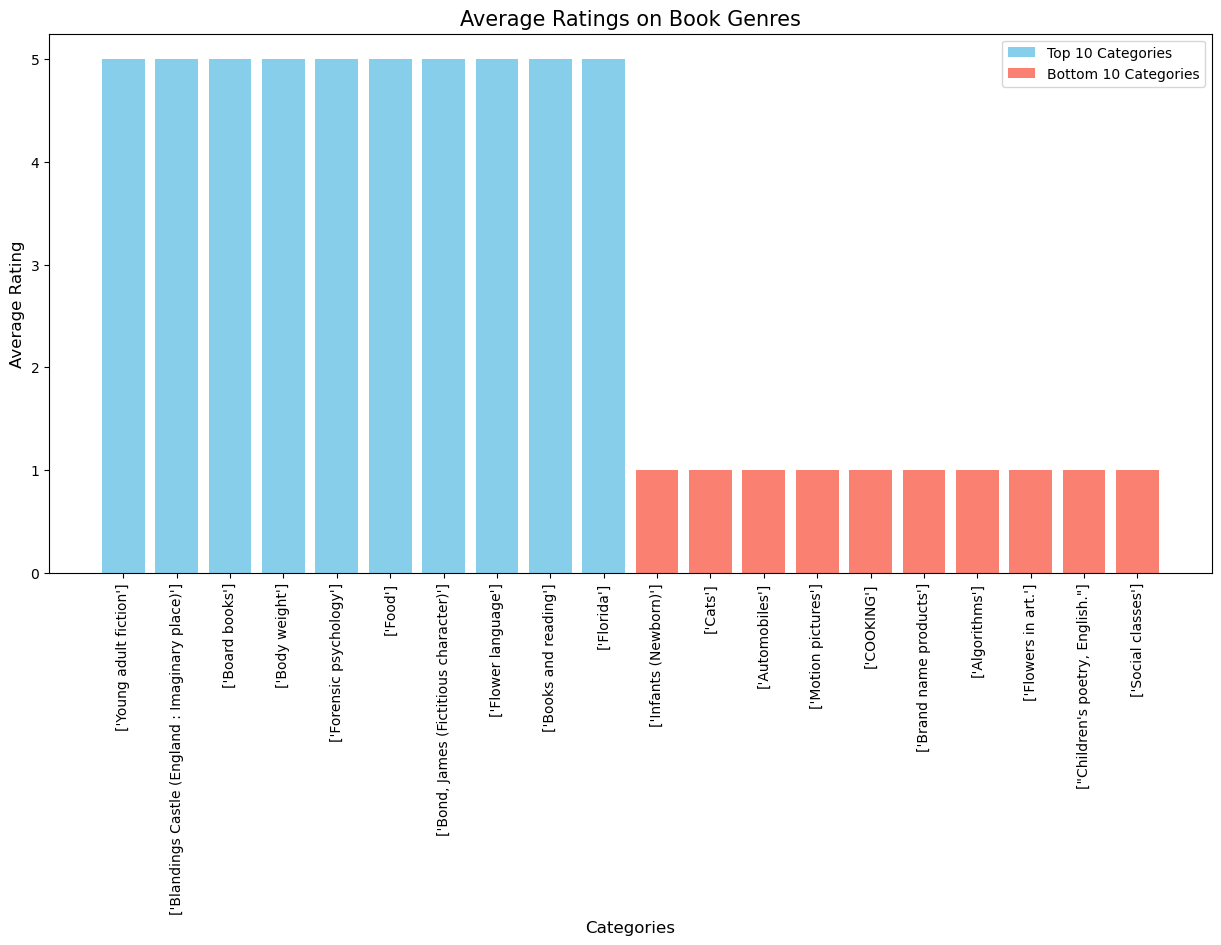

In [55]:
# Calculate average ratings by categories
# Group by 'categories' and calculate the mean of 'reviewScore'
avg_cat_rating = amazon_books.groupby('categories')['reviewScore'].mean().reset_index().sort_values(ascending=False, by='reviewScore').head(10)
avg_cat_rating_d =amazon_books.groupby('categories')['reviewScore'].mean().reset_index().sort_values(ascending=False, by='reviewScore').tail(10)

# Plotting the bar charts for top 10 and bottom 10 categories
plt.figure(figsize=(15, 7))

# Top 10 categories
plt.bar(avg_cat_rating['categories'], avg_cat_rating['reviewScore'], color='skyblue', label='Top 10 Categories')

# Bottom 10 categories
plt.bar(avg_cat_rating_d['categories'], avg_cat_rating_d['reviewScore'], color='salmon', label='Bottom 10 Categories')

# Adding titles and labels
plt.title('Average Ratings on Book Genres', fontsize=15)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation='vertical')
plt.legend()

# Show the plot
plt.show()


*Answer to research question: the bar plot above show the names of 10 books top rating and 10 books less rating 

### Research question 2: Top 10 Authors with 5 star Ratings 


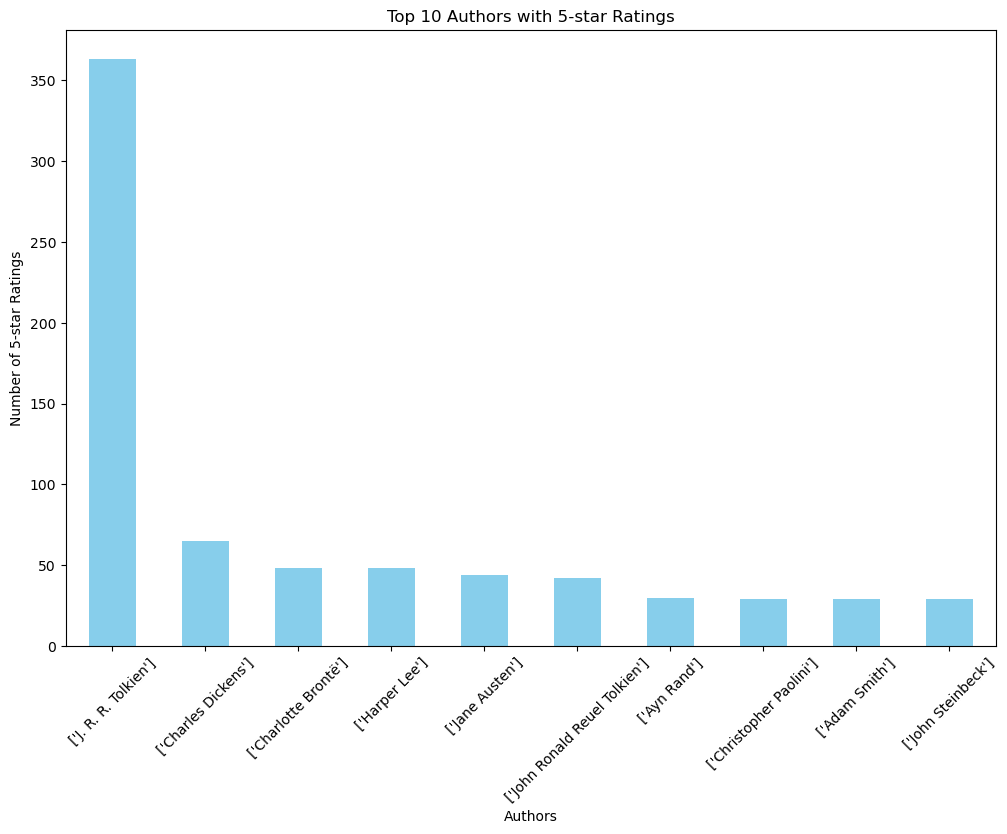

In [56]:
# Filter reviews with 5-star ratings
five_star_reviews = amazon_books[amazon_books['reviewScore'] == 5]

# Count the number of 5-star ratings per author
top_authors = five_star_reviews['authors'].value_counts().head(10)

# Plot the top 10 authors
plt.figure(figsize=(12, 8))
top_authors.plot(kind='bar', color='skyblue')
plt.xlabel('Authors')
plt.ylabel('Number of 5-star Ratings')
plt.title('Top 10 Authors with 5-star Ratings')
plt.xticks(rotation=45)
plt.show()


*Answer to research question: The bar chart above display the top 10 authors with the most 5-star ratings, indicating which authors are highly favored by readers.

### **5.2:** Reflection
If I had more time to complete the project, I would:

* 1- Further clean and preprocess the review text data by removing stopwords, stemming, and lemmatization to improve the accuracy of the word cloud.
* 2-Explore additional research questions, such as the impact of book price on ratings or the correlation between the number of ratings and average rating.